# Theoretical intensity distributions for a focused Gaussian beam through a circular aperture

In this notebook I demonstrate how to use FocusedGaussianBeam from gaussian_beam_propagation.py to generate the theoretical distributions and plots.

In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import seaborn as sns

import sys
sys.path.insert(1, '../')
from src.core import gaussian_beam_propagation as gbp

mplstyle.use('seaborn')
sns.set_style("darkgrid", {'axes.grid' : False})
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.cubehelix_palette(100, start=.5, rot=-.75, reverse=True))

/var/folders/k7/yq0x0lnn2ns__6748g658mxm0000gn/T/ipykernel_15609/698879508.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mplstyle.use('seaborn')


In [2]:
# path where to save figures
path = "../figures/notebooks"

In [3]:
def plot_isophotes(X, Z, intensity, alpha):
    """
    Plots the intensity distribution of a Gaussian beam through a circular aperture
    with the axial and transverse profiles.
    """

    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4)
    ax3 = plt.subplot2grid((3, 5), (1, 0), colspan=4, rowspan=2)
    ax4 = plt.subplot2grid((3, 5), (1, 4), rowspan=2)

    # Transverse profiles
    extent = (X[0, 0], X[0, -1], Z[0, 0], Z[-1, 0])
    ax4.plot(intensity[:, intensity.shape[1]//2], Z[:, 0])
    ax4.set_xlabel(r'$I_{(u=0)} / I_0$')

    # Axial profiles
    ax4.set_yticklabels([])
    ax1.plot(X[0], intensity[intensity.shape[0]//2, :])
    ax1.set_ylabel(r'$I_{(v=0)} / I_0$')
    ax1.set_xticklabels([])

    # Intensity distribution with isophotes
    ax3.contour(intensity, levels=np.logspace(-4,1, 20), cmap=plt.cm.gray, linewidths=0.5, extent=extent)
    ax3.imshow(np.log(intensity), cmap=cmap, extent=extent)
    ax3.set_ylabel(r'$v$ (rad)')
    ax3.set_xlabel(r'$u$ (rad)')
    ax3.text(
        22, 10, 
        r'$\alpha$ = ' + f'{int(alpha)}', 
        bbox={'facecolor': 'white', 'pad': 10, 'edgecolor':'none'}
    )

    plt.tight_layout()
    plt.savefig(f'{path}/lommel-{alpha}.png', dpi=300)

## Initialize FocusedGaussianBeam objects

In [4]:
# create the beam objects, each beam having various truncation coefficients
beams = []
for trunc_coeff in np.arange(0, 10, 1):
    beam = gbp.FocusedGaussianBeam(NA=0.4, n=1.33, trunc_coeff=trunc_coeff)
    beams.append(beam)

/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  self.w_incident = self.aperture / np.sqrt(trunc_coeff)


### Axial intensity

/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:130: RuntimeWarning: divide by zero encountered in divide
  s1 = (P * alpha**2 * (1-Z) / (2*Z)) + (alpha**2 * eps / (1 + eps**2))
/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:133: RuntimeWarning: invalid value encountered in multiply
  f1 = P**2 * alpha**4 / (4 * Z**2 * (s1**2 + s2**2))
/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:134: RuntimeWarning: invalid value encountered in cos
  f2 = 1 + expit(2*s2) - 2*expit(s2)*np.cos(s1)


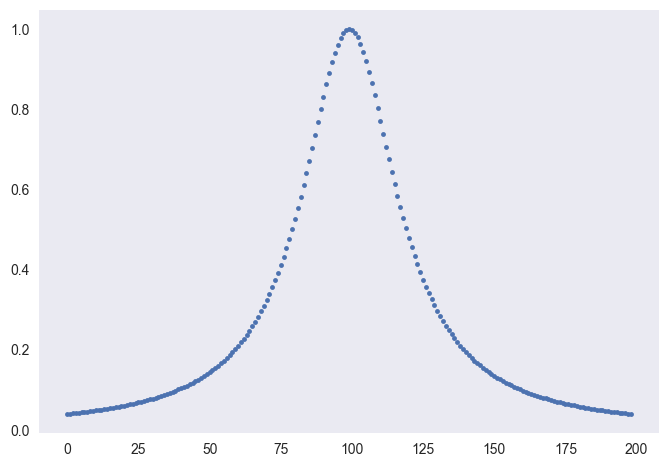

In [5]:
z = np.linspace(-30, 30, 199)
plt.plot(beams[4].axial_intensity(z), '.')

### Intensity distribution with isophotes

In [6]:
# Debye approximation field for the beams
intensities = []
for beam in beams:
    u = np.linspace(-30, 30, 200, dtype=np.float64)
    v = np.linspace(-15, 15, 100, dtype=np.float64)
    
    V, U, field = beam.debye_approx_field(v, u)
    intensity = np.array(np.abs(field)**2, dtype=np.float64)
    intensity = intensity / np.amax(intensity)
    
    intensities.append(intensity / np.amax(intensity))


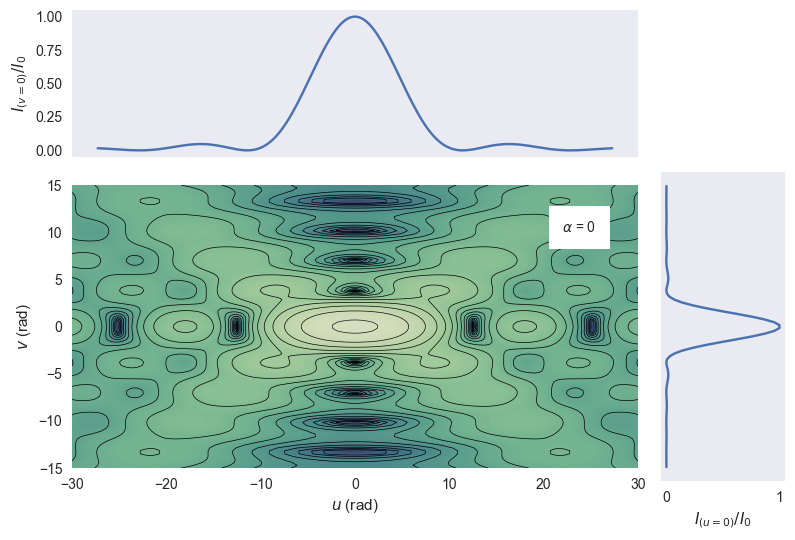

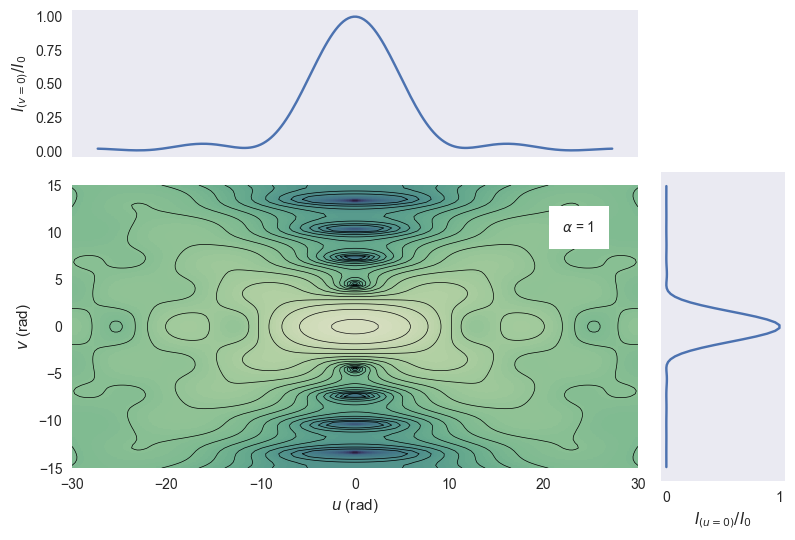

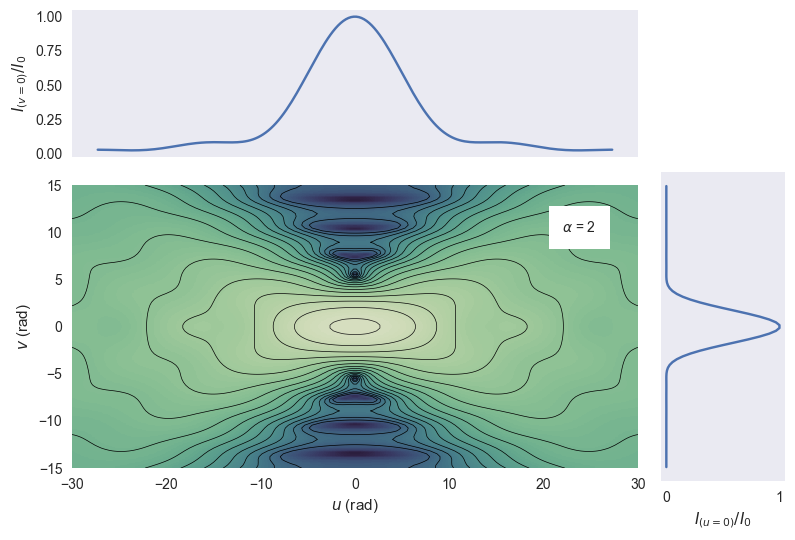

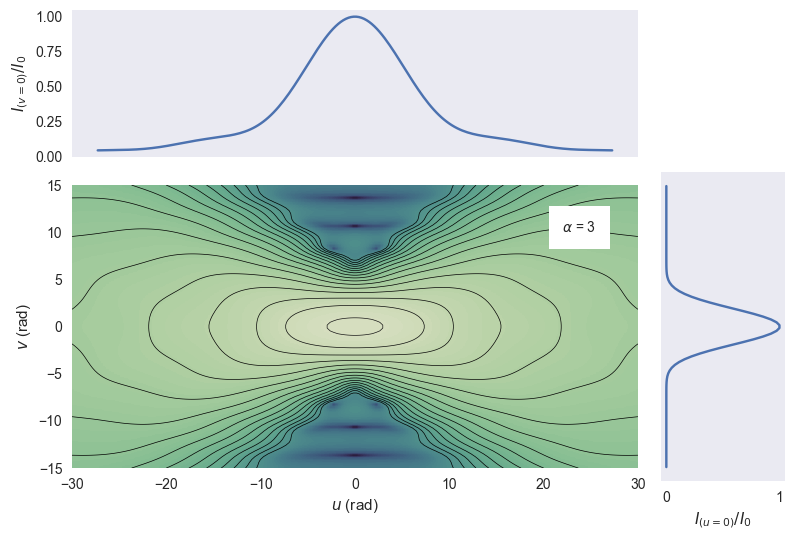

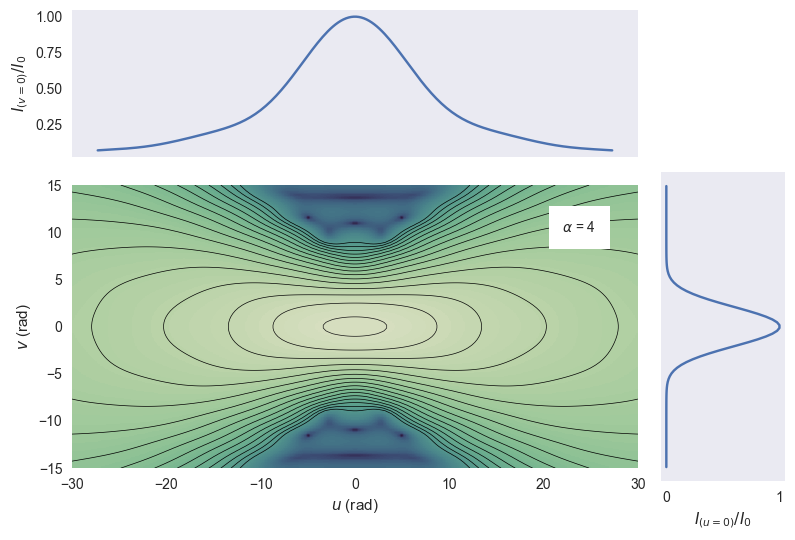

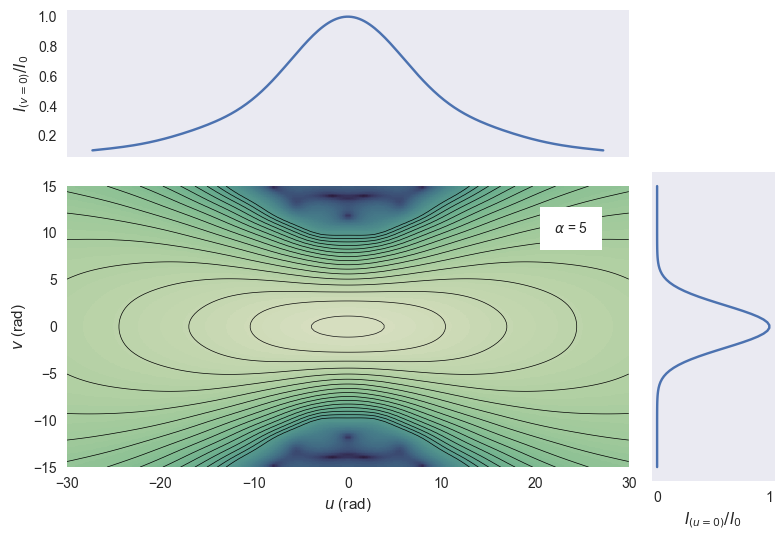

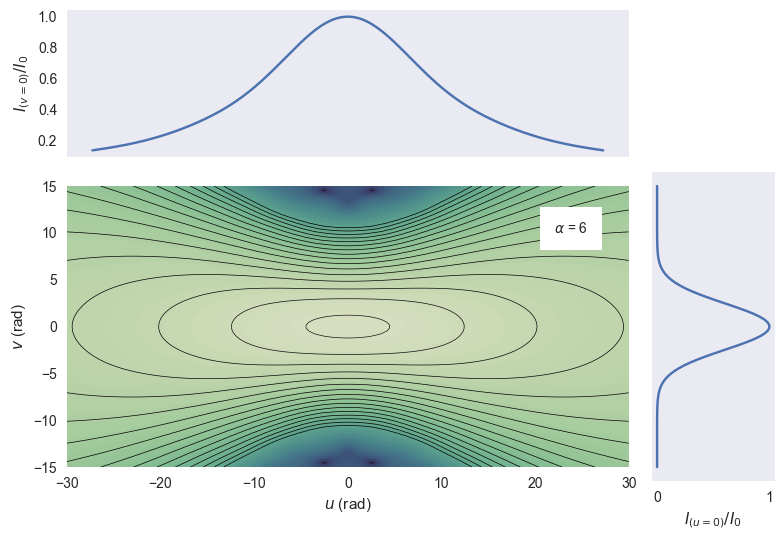

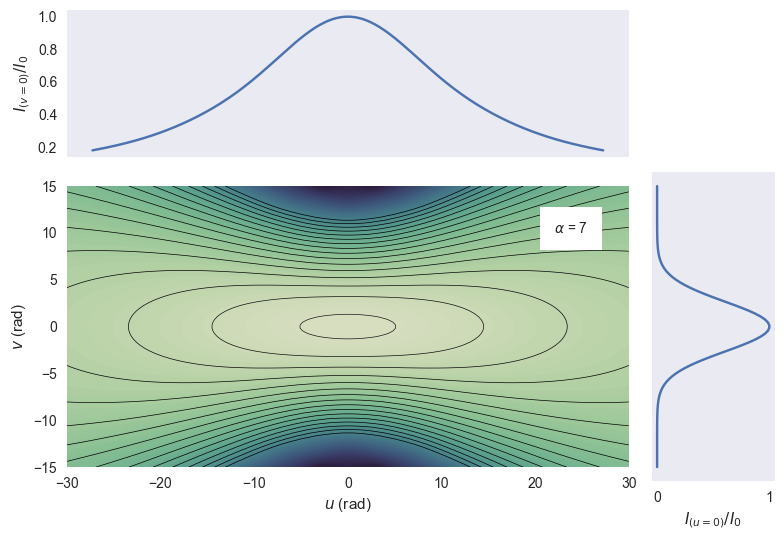

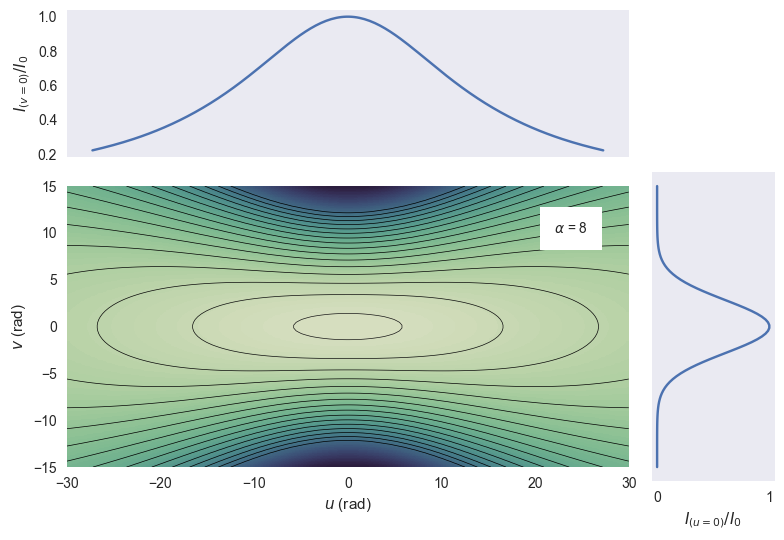

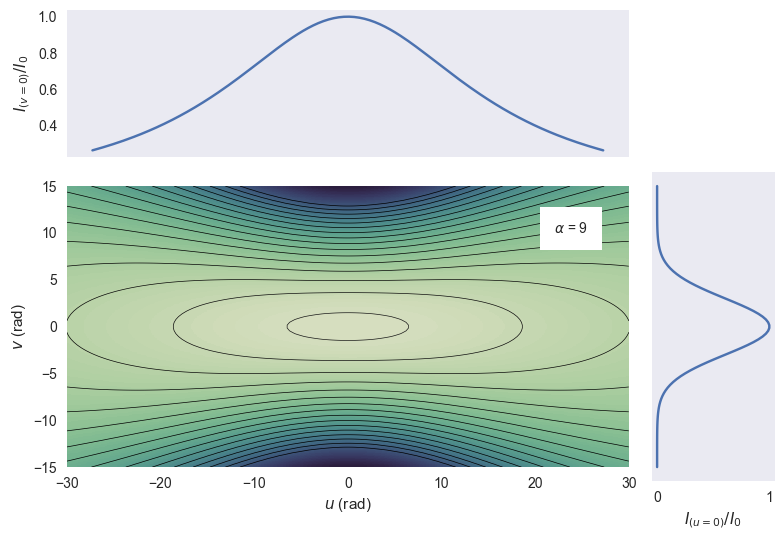

In [7]:
i = 0
for beam in beams:
    intensity = intensities[i]
    plot_isophotes(U, V, intensity, beam.trunc_coeff)    
    diff = np.abs(intensity[:, intensity.shape[1]//2]-(1/np.e**2))
    beamwaistloc = np.argmin(diff)
    i += 1